In [2]:
### automatically refresh the buffer

%load_ext autoreload
%autoreload 2

### solve the auto-complete issue

%config Completer.use_jedi = False

### lvl 1 setups

import sys
sys.path.append('/portal1/dell/GitHub/WAYS')
sys.path.append('/portal1/dell/GitHub/sanctuary')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

### lvl 2 setups (systerm)

import os
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from numpy import hstack
from matplotlib import pyplot
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import warnings
warnings.filterwarnings('ignore')

In [3]:
from numpy import polyfit, poly1d
from stats import cr
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [4]:
import os
import glob
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from stats import cr
from gistool import basemap, stack_image, stack_shp, stack_hatch, stack_shp_cn, ncslice
from spatial import upscale
import statsmodels.formula.api as smf
from scipy.stats.mstats import theilslopes
from scipy.stats import kendalltau
import cartopy.crs as ccrs

import pandas as pd
import scipy.stats as scs
import matplotlib.pyplot as plt

import climate_indices as indices
from climate_indices import compute
from climate_indices import utils, indices

In [5]:
shp='/portal3/gis/LMRB_Boundary/Lancang_Mekong_Basin/Lancang_Mekong_Basin.shp'
dsp = xr.open_dataset('/home/wang-k/main/MLdrought/weekly_data/prec_weekly_lmrb.nc')
dspet = xr.open_dataset('/home/wang-k/main/MLdrought/weekly_data/pet_weekly_lmrb.nc')

In [6]:
dsp

<xarray.Dataset>
Dimensions:  (time: 3276, lat: 102, lon: 61)
Coordinates:
  * lon      (lon) float32 93.75 94.0 94.25 94.5 ... 108.0 108.2 108.5 108.8
  * lat      (lat) float32 33.75 33.5 33.25 33.0 32.75 ... 9.5 9.25 9.0 8.75 8.5
  * time     (time) datetime64[ns] 1960-01-07 1960-01-14 ... 2022-12-30
Data variables:
    tp       (time, lat, lon) float64 ...

In [7]:
## choose prec wet season
dsp_wet=dsp.sel(time=((dsp.time.dt.month == 5) | (dsp.time.dt.month == 6) |
                      (dsp.time.dt.month == 7) | (dsp.time.dt.month == 8) |
                      (dsp.time.dt.month == 9) | (dsp.time.dt.month == 10)))

## choose prec dry season
dsp_dry=dsp.sel(time=((dsp.time.dt.month == 1) | (dsp.time.dt.month == 2) |
                      (dsp.time.dt.month == 3) | (dsp.time.dt.month == 4) |
                      (dsp.time.dt.month == 11) | (dsp.time.dt.month == 12)))

In [8]:
## choose pet wet season
dspet_wet=dspet.sel(time=((dspet.time.dt.month == 5) | (dspet.time.dt.month == 6) |
                      (dspet.time.dt.month == 7) | (dspet.time.dt.month == 8) |
                      (dspet.time.dt.month == 9) | (dspet.time.dt.month == 10)))

## choose pet dry season
dspet_dry=dspet.sel(time=((dspet.time.dt.month == 1) | (dspet.time.dt.month == 2) |
                      (dspet.time.dt.month == 3) | (dspet.time.dt.month == 4) |
                      (dspet.time.dt.month == 11) | (dspet.time.dt.month == 12)))

In [9]:
dspwet_data = dsp_wet.tp.values
dspdry_data = dsp_dry.tp.values
petwet_data = dspet_wet.pev.values
petdry_data = dspet_dry.pev.values

# SPEI in dry and wet season weekly

In [10]:
# using climate indices package calculate SPEI wet season
spei_w = np.empty((1638, 102, 61))
for i in range(0,102):
    for j in range(0,61):
        speiw = indices.spei(precips_mm=dspwet_data[:,i,j],
                            pet_mm=petwet_data[:,i,j],
                            scale=1,
                            distribution=indices.Distribution.gamma,
                            periodicity=compute.Periodicity.daily,
                            data_start_year=1960,
                            calibration_year_initial=1960,
                            calibration_year_final=2022)
        spei_w[:, i, j] = speiw

2023-06-27  10:34:21 WARNING Input contains negative values -- all negatives clipped to zero
2023-06-27  10:34:21 WARNING Input contains negative values -- all negatives clipped to zero


In [11]:
# using climate indices package calculate SPEI wet season
spei_d = np.empty((1638, 102, 61))
for i in range(0,102):
    for j in range(0,61):
        speid = indices.spei(precips_mm=dspdry_data[:,i,j],
                            pet_mm=petdry_data[:,i,j],
                            scale=1,
                            distribution=indices.Distribution.gamma,
                            periodicity=compute.Periodicity.daily,
                            data_start_year=1960,
                            calibration_year_initial=1960,
                            calibration_year_final=2022)
        spei_d[:, i, j] = speid

2023-06-27  10:34:22 WARNING Input contains negative values -- all negatives clipped to zero


2023-06-27  10:34:22 WARNING Input contains negative values -- all negatives clipped to zero
2023-06-27  10:34:22 WARNING Input contains negative values -- all negatives clipped to zero
2023-06-27  10:34:22 WARNING Input contains negative values -- all negatives clipped to zero
2023-06-27  10:34:22 WARNING Input contains negative values -- all negatives clipped to zero
2023-06-27  10:34:22 WARNING Input contains negative values -- all negatives clipped to zero
2023-06-27  10:34:22 WARNING Input contains negative values -- all negatives clipped to zero
2023-06-27  10:34:22 WARNING Input contains negative values -- all negatives clipped to zero
2023-06-27  10:34:22 WARNING Input contains negative values -- all negatives clipped to zero
2023-06-27  10:34:22 WARNING Input contains negative values -- all negatives clipped to zero
2023-06-27  10:34:22 WARNING Input contains negative values -- all negatives clipped to zero
2023-06-27  10:34:22 WARNING Input contains negative values -- all neg

# SPEI PRE in dry and wet season weekly

In [12]:
# using climate indices package calculate SPEI wet season
speipre_w = np.empty((1638, 102, 61))
for i in range(0,102):
    for j in range(0,61):
        speiprew = indices.spei(precips_mm=dspwet_data[:,i,j],
                            pet_mm=np.tile(petwet_data[:,i,j].mean(),1638),
                            scale=1,
                            distribution=indices.Distribution.gamma,
                            periodicity=compute.Periodicity.daily,
                            data_start_year=1960,
                            calibration_year_initial=1960,
                            calibration_year_final=2022)
        speipre_w[:, i, j] = speiprew

2023-06-27  10:34:28 WARNING Input contains negative values -- all negatives clipped to zero
2023-06-27  10:34:28 WARNING Input contains negative values -- all negatives clipped to zero


In [13]:
# using climate indices package calculate SPEI wet season
speipre_d = np.empty((1638, 102, 61))
for i in range(0,102):
    for j in range(0,61):
        speipred = indices.spei(precips_mm=dspdry_data[:,i,j],
                            pet_mm=np.tile(petdry_data[:,i,j].mean(),1638),
                            scale=1,
                            distribution=indices.Distribution.gamma,
                            periodicity=compute.Periodicity.daily,
                            data_start_year=1960,
                            calibration_year_initial=1960,
                            calibration_year_final=2022)
        speipre_d[:, i, j] = speipred

2023-06-27  10:34:29 WARNING Input contains negative values -- all negatives clipped to zero
2023-06-27  10:34:29 WARNING Input contains negative values -- all negatives clipped to zero
2023-06-27  10:34:29 WARNING Input contains negative values -- all negatives clipped to zero
2023-06-27  10:34:29 WARNING Input contains negative values -- all negatives clipped to zero
2023-06-27  10:34:29 WARNING Input contains negative values -- all negatives clipped to zero
2023-06-27  10:34:29 WARNING Input contains negative values -- all negatives clipped to zero
2023-06-27  10:34:29 WARNING Input contains negative values -- all negatives clipped to zero
2023-06-27  10:34:29 WARNING Input contains negative values -- all negatives clipped to zero
2023-06-27  10:34:29 WARNING Input contains negative values -- all negatives clipped to zero
2023-06-27  10:34:29 WARNING Input contains negative values -- all negatives clipped to zero
2023-06-27  10:34:29 WARNING Input contains negative values -- all neg

2023-06-27  10:34:29 WARNING Input contains negative values -- all negatives clipped to zero
2023-06-27  10:34:29 WARNING Input contains negative values -- all negatives clipped to zero
2023-06-27  10:34:29 WARNING Input contains negative values -- all negatives clipped to zero
2023-06-27  10:34:29 WARNING Input contains negative values -- all negatives clipped to zero
2023-06-27  10:34:29 WARNING Input contains negative values -- all negatives clipped to zero
2023-06-27  10:34:29 WARNING Input contains negative values -- all negatives clipped to zero
2023-06-27  10:34:29 WARNING Input contains negative values -- all negatives clipped to zero
2023-06-27  10:34:30 WARNING Input contains negative values -- all negatives clipped to zero
2023-06-27  10:34:30 WARNING Input contains negative values -- all negatives clipped to zero
2023-06-27  10:34:30 WARNING Input contains negative values -- all negatives clipped to zero
2023-06-27  10:34:30 WARNING Input contains negative values -- all neg

# here#################################

# Flash Drought (SPEI < -1.28 & ΔSPEI < -2 within four weeks)

### flash drought in dry season

In [14]:
dryfd = []

for m in range(63):
    start_idx = m * 26
    end_idx = (m + 1) * 26
    for i in range(0, 102):
        for j in range(0, 61): 
            array = spei_d[:, i, j]
            b = []
            k = start_idx
            if np.isnan(array[0]):
                dryfd.append(np.tile(np.nan, 26))
            else:    
                while k < end_idx:
                    for n in range(1, 5):
                        if k >= n and array[k] <= -1.28 and array[k] - array[k - n] <= -2:
                            b.append(array[k])
                            k += 1
                            break
                    else:
                        b.append(np.nan)
                        k += 1
                        continue

                    for a in range(k, end_idx):
                        if array[a] < -1.28:
                            b.append(array[a])
                            k += 1
                        else:
                            break

                dryfd.append(b)
dryfd = np.array(dryfd).reshape(63,102,61,26)
dryfd = dryfd.transpose(0,3,1,2)

### flash drought in wet season

In [15]:
wetfd = []

for m in range(63):
    start_idx = m * 26
    end_idx = (m + 1) * 26
    for i in range(0, 102):
        for j in range(0, 61): 
            array = spei_w[:, i, j]
            b = []
            k = start_idx
            if np.isnan(array[0]):
                wetfd.append(np.tile(np.nan, 26))
            else:    
                while k < end_idx:
                    for n in range(1, 5):
                        if k >= n and array[k] <= -1.28 and array[k] - array[k - n] <= -2:
                            b.append(array[k])
                            k += 1
                            break
                    else:
                        b.append(np.nan)
                        k += 1
                        continue

                    for a in range(k, end_idx):
                        if array[a] < -1.28:
                            b.append(array[a])
                            k += 1
                        else:
                            break

                wetfd.append(b)
wetfd = np.array(wetfd).reshape(63,102,61,26)
wetfd = wetfd.transpose(0,3,1,2)


In [16]:
totalfd = np.concatenate((wetfd, dryfd), axis=1)

#  drought SPEI_PRE 

## SPEI_PRE dryseason

In [17]:
split_array = np.array_split(speipre_d, 63, axis=0)
dryfd_pre_ = np.array(split_array)

dryfd_pre = np.full_like(dryfd, np.nan)
dryfd_pre[dryfd>-1000] = dryfd_pre_[dryfd>-1000]

## SPEI_PRE wetseason

In [18]:
split_array = np.array_split(speipre_w, 63, axis=0)
wetfd_pre_ = np.array(split_array)

wetfd_pre = np.full_like(wetfd, np.nan)
wetfd_pre[wetfd>-1000] = wetfd_pre_[wetfd>-1000]

In [19]:
total_fdpre = np.concatenate((wetfd_pre, dryfd_pre), axis=1)

# calculate PRE and AED contribution

In [20]:
con_AED_dry = (dryfd_pre-dryfd)/-dryfd
con_AED_dry[con_AED_dry < 0] = 0
con_AED_dry[con_AED_dry > 1] = 1

con_AED_wet = (wetfd_pre-wetfd)/-wetfd
con_AED_wet[con_AED_wet < 0] = 0
con_AED_wet[con_AED_wet > 1] = 1

con_AED_total = (total_fdpre-totalfd)/-totalfd
con_AED_total[con_AED_total < 0] = 0
con_AED_total[con_AED_total > 1] = 1

# plot spatial temporal trend

## plot the AED contribution during 1960-2022 spatially

In [21]:
from pylab import *
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
clist1 =['#ffffff','#f8ad9d','#3a20f0']
red1 = LinearSegmentedColormap.from_list('chaos',clist1)
clist2 =['#fffdf7','#99d6ea','#6798c0','#f0a7a0','#f26ca7']
cmap2 = LinearSegmentedColormap.from_list('chaos',clist2)
clist4 =['#fffdf7','#99d6ea','#6798c0','#f0a7a0','#f26ca7','#a019a6']
cmap4 = LinearSegmentedColormap.from_list('chaos',clist4)



In [22]:
varia =[con_AED_total,con_AED_wet,con_AED_dry,] 

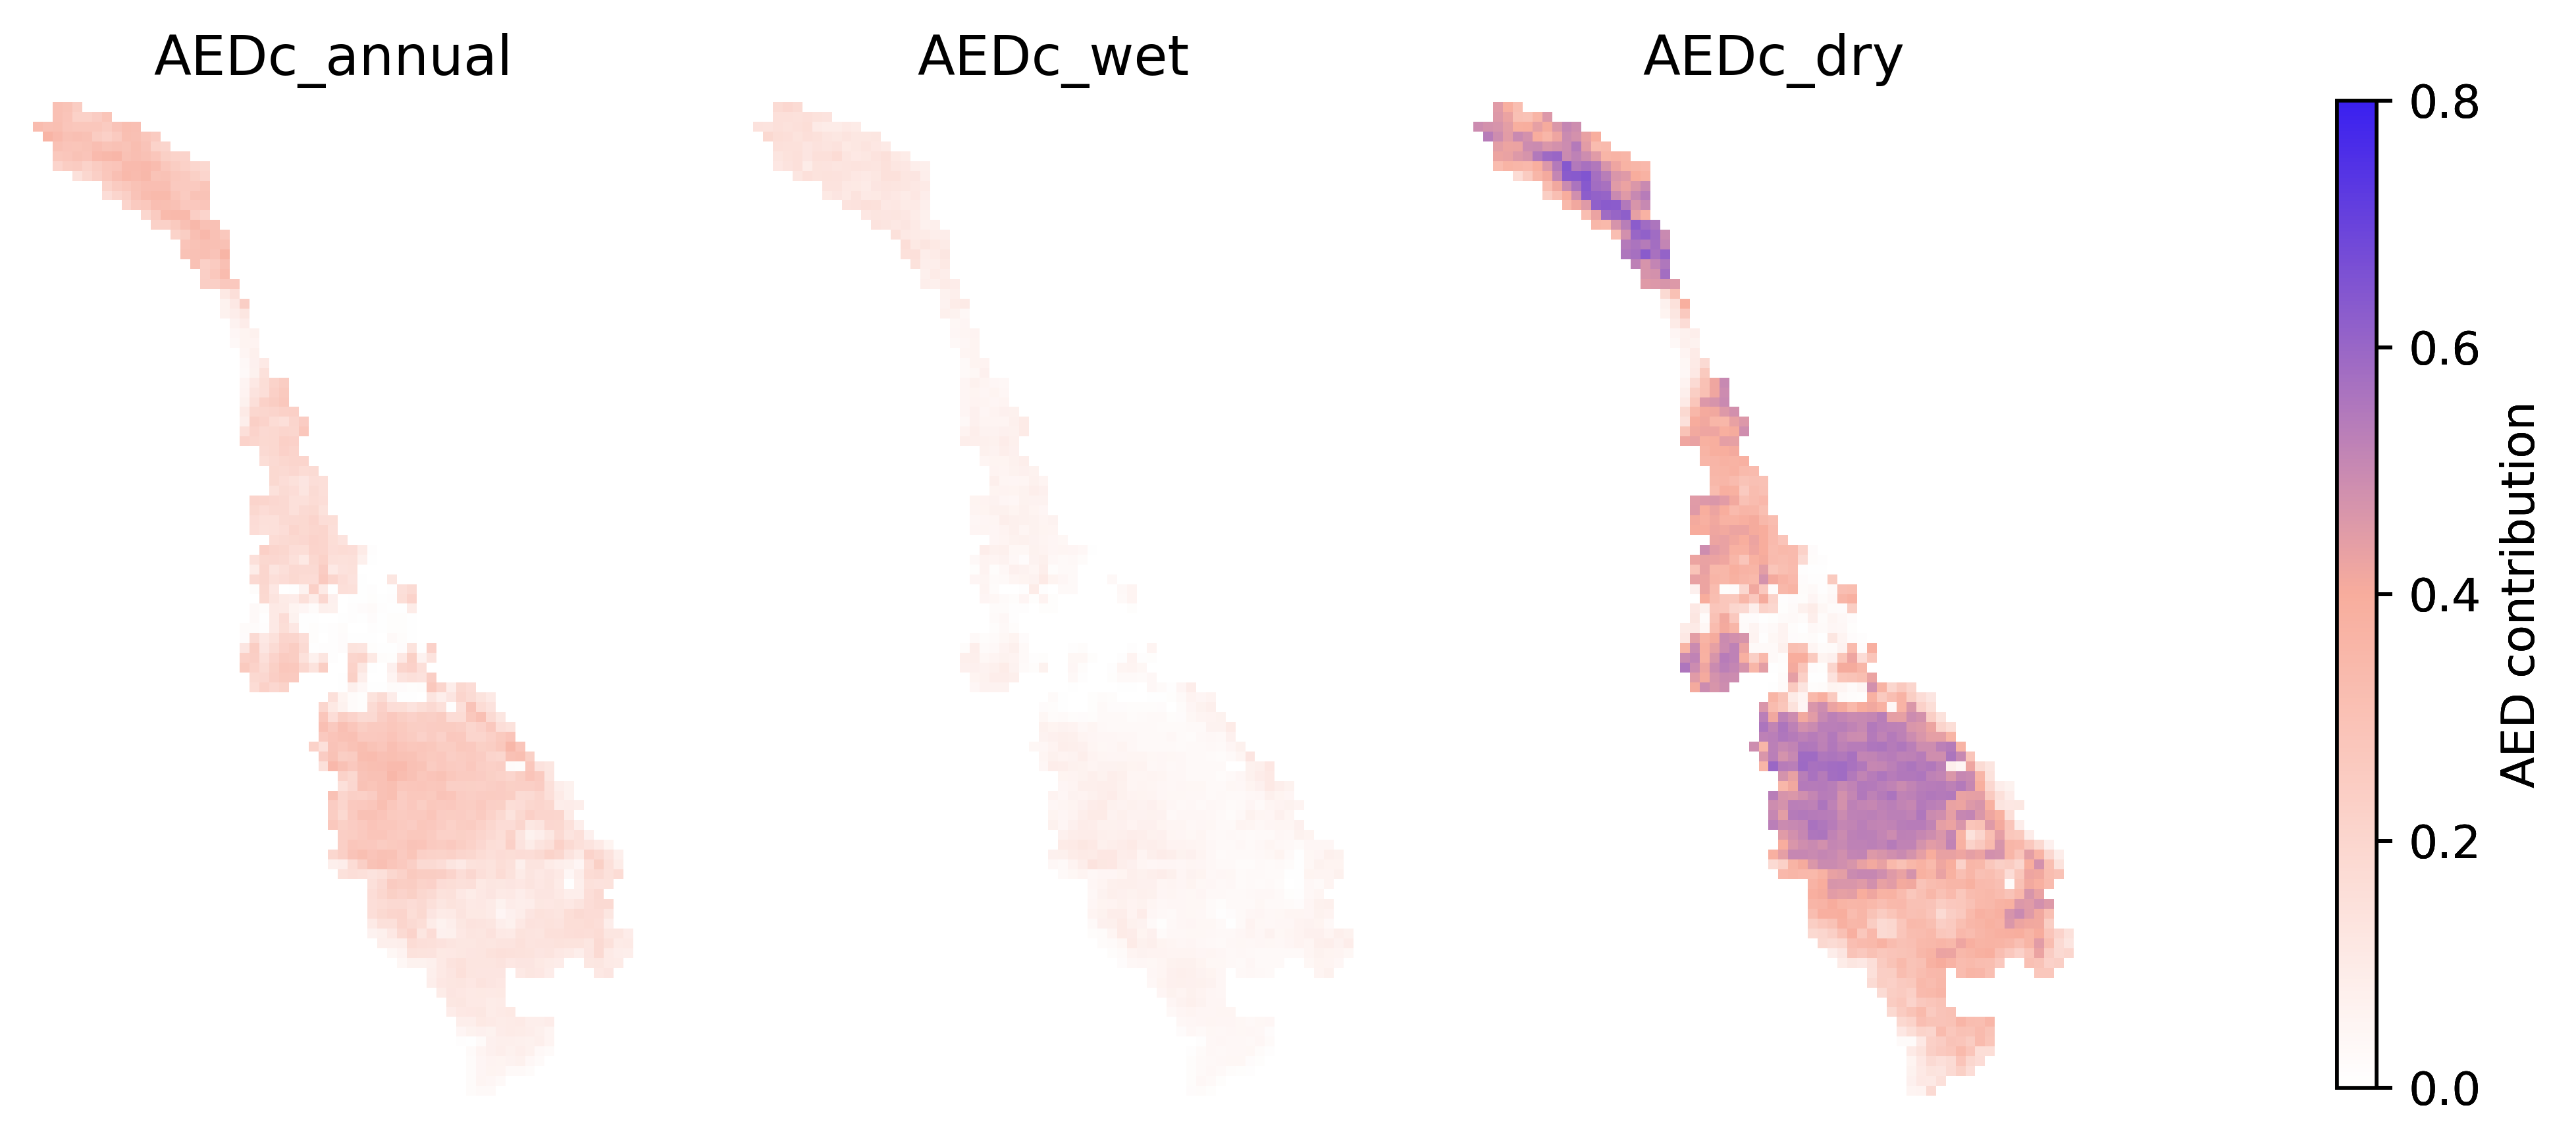

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(8, 6), dpi=500)
images = []

namess = ['AEDc_annual', 'AEDc_wet', 'AEDc_dry']

varia1 =[np.nanmean(con_AED_total,axis=(0,1)),
         np.nanmean(con_AED_wet,axis=(0,1)),
         np.nanmean(con_AED_dry,axis=(0,1))] 

for i, (qt, subplot, name) in enumerate(zip(varia1, ax.flat, namess)):
    im = subplot.imshow(qt, cmap=red1, interpolation='nearest')
    images.append(im)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_frame_on(False)
    # ax[-1, -1].axis('off')
    subplot.set_title(name)

    cax = fig.add_axes([1., 0.25, 0.015, 0.5]) 
    cbar = plt.colorbar(im, cax=cax)
    cbar.set_label('AED contribution')
    im.set_clim(vmin=0.0, vmax=0.8)
    cbar.set_ticks([0.0, 0.2, 0.4, 0.6, 0.8])

plt.show()


# plot the AED contribution during 1960-2022 temporally

In [24]:
con_AED_dry = (dryfd_pre-dryfd)/-dryfd
con_AED_dry[con_AED_dry < 0] = 0
con_AED_dry[con_AED_dry > 1] = 1

con_AED_wet = (wetfd_pre-wetfd)/-wetfd
con_AED_wet[con_AED_wet < 0] = 0
con_AED_wet[con_AED_wet > 1] = 1

con_AED_total = (total_fdpre-totalfd)/-totalfd
con_AED_total[con_AED_total < 0] = 0
con_AED_total[con_AED_total > 1] = 1

In [25]:
varia =[con_AED_total,con_AED_wet,con_AED_dry,] 

In [26]:
varia3 =[np.nanmean(con_AED_total,axis=(1,2,3)),
         np.nanmean(con_AED_wet,axis=(1,2,3)),
         np.nanmean(con_AED_dry,axis=(1,2,3))] 

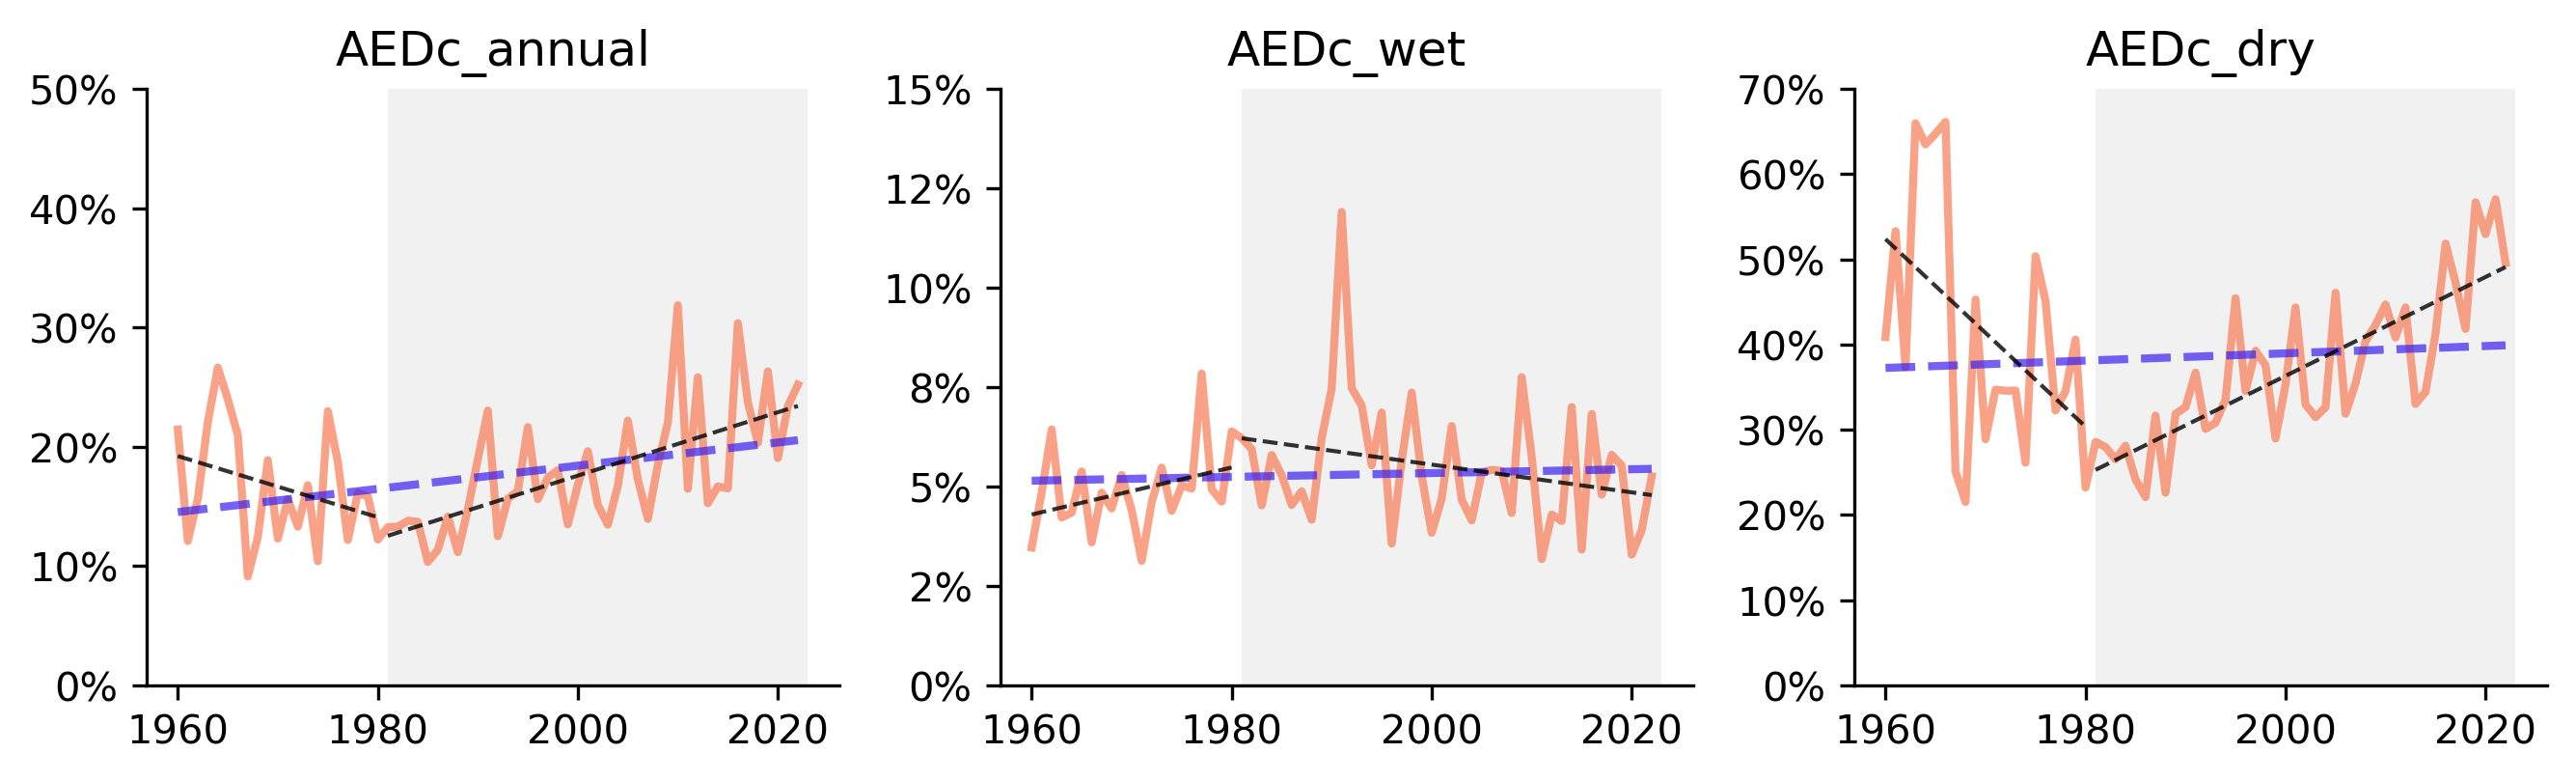

In [31]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
varia3 = [np.nanmean(con_AED_total, axis=(1, 2, 3)),
          np.nanmean(con_AED_wet, axis=(1, 2, 3)),
          np.nanmean(con_AED_dry, axis=(1, 2, 3))]
namess = ['AEDc_annual', 'AEDc_wet', 'AEDc_dry']
x = np.arange(63)
x1 = np.arange(0,21)
x2 = np.arange(21,63)
fig, axes = plt.subplots(1, 3, figsize=(9, 2.8), dpi=300)

for i, ax in enumerate(axes.flat):
    slope, intercept, r_value, p_value, std_err = linregress(x, varia3[i])
    slope1, intercept1, r_value1, p_value1, std_err1 = linregress(x1, varia3[i][0:21])
    slope2, intercept2, r_value2, p_value2, std_err2 = linregress(x2, varia3[i][21:63])
    ax.plot(varia3[i],color="#f97b54",lw=2,alpha=0.7)
    ax.set_title(namess[i])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xticks([0, 20, 40, 60])  
    ax.set_xticklabels(['1960',  '1980', '2000', '2020'])  
    ax.plot(x, intercept + slope * x, color='#3a20f0', linestyle='--',lw= 2,alpha=0.7)
    ax.plot(x1, intercept1 + slope1 * x1, color='k', linestyle='--',lw= 1,alpha=0.8)
    ax.plot(x2, intercept2 + slope2 * x2, color='k', linestyle='--',lw= 1,alpha=0.8)
    ax.axvspan(21, 63, facecolor='lightgray', alpha=0.3)
    ax.yaxis.set_major_formatter(PercentFormatter(xmax=1,decimals=0))
    if i == 0:
        ax.set_ylim(0, 0.5)
        
        
    if i == 1:
        ax.set_ylim(0, 0.15)
        
        
    if i == 2:
        ax.set_ylim(0, 0.7)
        
plt.tight_layout()
plt.show()


# 

# AED contribution trend

In [34]:
np.nanmean(con_AED_total,axis=(1))

1.0

In [41]:
namess6 =['d_a','d_wet','d_dry'] # after 1980
varia =[con_AED_total,con_AED_wet,con_AED_dry,] 
VVVV = [np.nanmean(con_AED_total,axis=(1)),
        np.nanmean(con_AED_wet,axis=(1)),
        np.nanmean(con_AED_dry,axis=(1))]


In [127]:
names = locals()

for k in range(0,3):
    names[namess6[k]+'_p'], names[namess6[k]+'_co']= [],[]
    for i in range(0,102):
        for j in range(0,61):
            array = VVVV[k][21:63, i, j]
            if np.isnan(np.nanmean(array)):
                names[namess6[k]+'_co'].append(np.nan)
                names[namess6[k]+'_p'].append(np.nan)
            elif array[~np.isnan(array)].shape[0] < 20:
                names[namess6[k]+'_co'].append(-999)
                names[namess6[k]+'_p'].append(-999)
            else :
                valid_indices = ~np.isnan(array)
                x = np.arange(VVVV[k][21:63, i, j].shape[0])
                x_valid = x[valid_indices]
                arr_valid = array[valid_indices]
                slope, intercept, r_value, p_value, std_err = linregress(x_valid, arr_valid)
                names[namess6[k]+'_co'].append(slope)

                if p_value < 0.05:
                    names[namess6[k]+'_p'].append(1)
                else:
                    names[namess6[k]+'_p'].append(np.nan)
                
    names[namess6[k]+'_p'] = np.array(names[namess6[k]+'_p']).reshape(102,61)
    names[namess6[k]+'_co'] = np.array(names[namess6[k]+'_co']).reshape(102,61)

In [152]:
clist5=['#035a96','#1079c3','#3d9fee','#ffffff','#ff6d6d','#f26ca7','#920efc']
cmap5 = LinearSegmentedColormap.from_list('chaos',clist5)

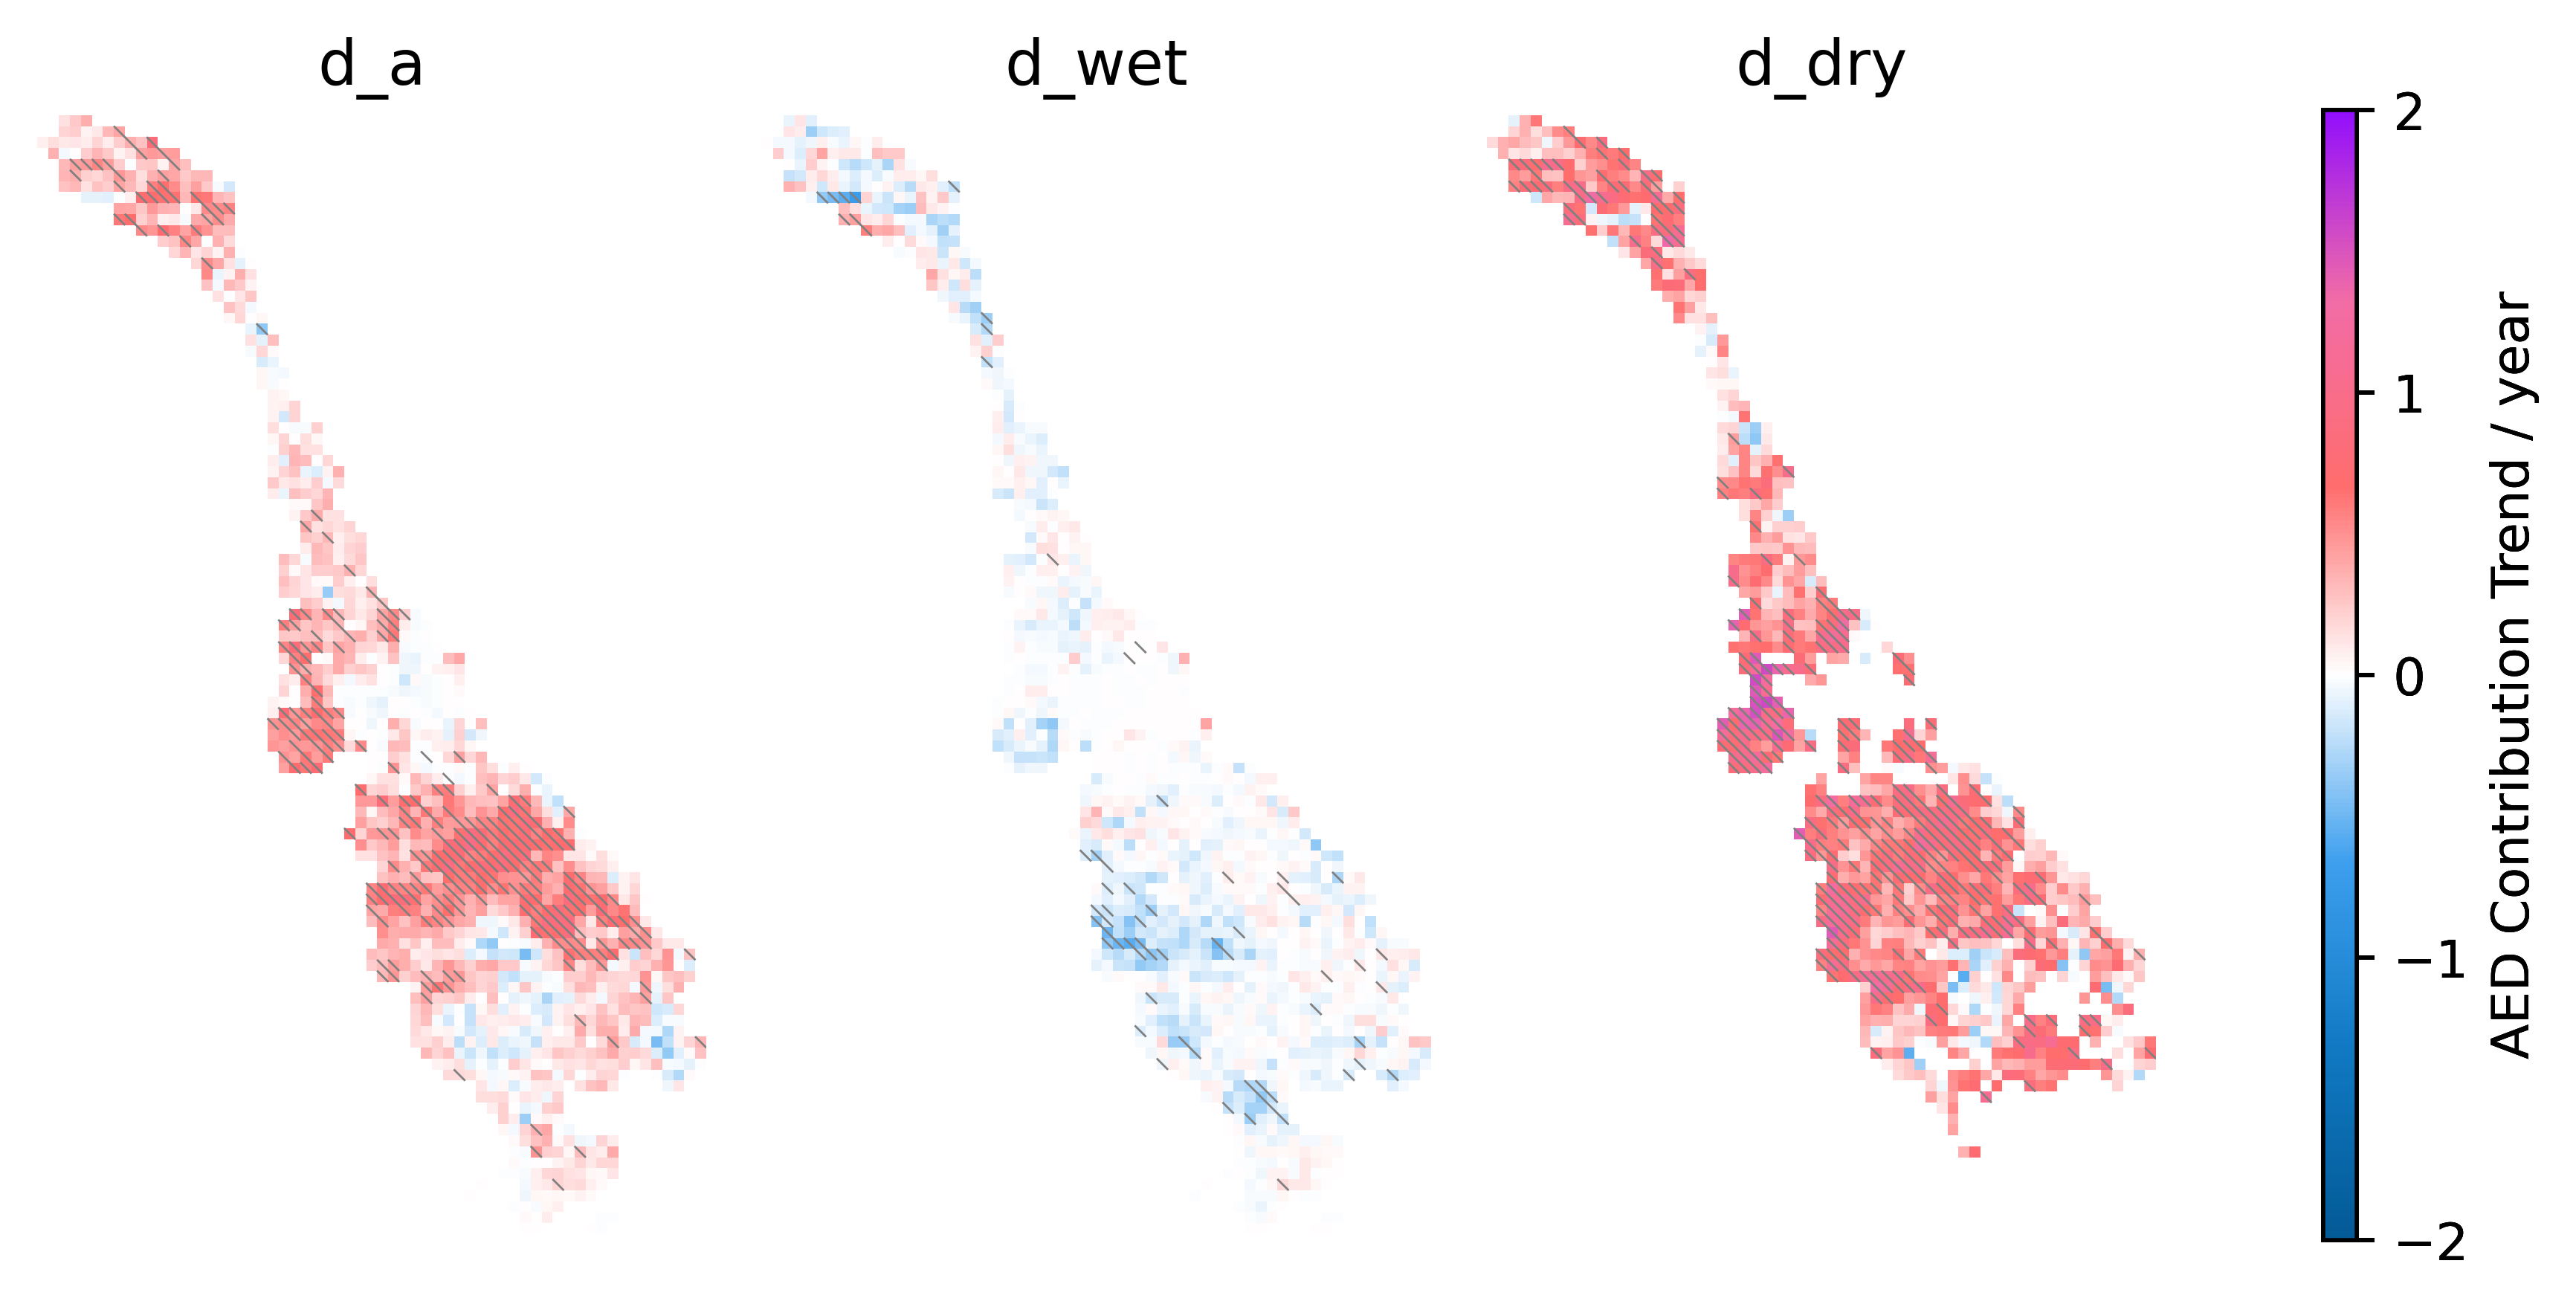

In [154]:
fig, ax = plt.subplots(1, 3, figsize=(6 , 4), dpi=500)
images = []

varia6c =[d_a_co,d_wet_co,d_dry_co]
varia6p =[d_a_p,d_wet_p,d_dry_p]

for i, (qt, ij, subplot, name) in enumerate(zip(varia6c, varia6p, ax.flat, namess6)):
    im = subplot.imshow(qt*100, cmap=cmap5, interpolation='nearest')
    images.append(im)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_frame_on(False)
    #ax[-1, -1].axis('off')
    subplot.set_title(name)

    # 显示显著性的对角线网格
    for y in range(ij.shape[0]):
        for x in range(ij.shape[1]):
            if ij[y, x] == 1:
                subplot.plot([x - 0.45, x + 0.45], [y - 0.45, y + 0.45], color='grey',lw=0.4)
    cax = fig.add_axes([1.05, 0.12, 0.015, 0.76]) 
    cbar = plt.colorbar(im, cax=cax)
    cbar.set_label('AED Contribution Trend / year')
    im.set_clim(vmin=-2, vmax=2)
    cbar.set_ticks([-2,-1,0,1,2])
plt.tight_layout()
plt.show()

# Probability Density Histogram

In [29]:
con_AED_dry = (dryfd_pre-dryfd)/-dryfd
con_AED_wet = (wetfd_pre-wetfd)/-wetfd
con_AED_total = (total_fdpre-totalfd)/-totalfd

In [30]:
pdf_con_AED_total = np.nanmean(con_AED_total,axis=(0,1))[~np.isnan(np.nanmean(con_AED_total,axis=(0,1)))]
pdf_con_AED_wet = np.nanmean(con_AED_wet,axis=(0,1))[~np.isnan(np.nanmean(con_AED_wet,axis=(0,1)))]
pdf_con_AED_dry = np.nanmean(con_AED_dry,axis=(0,1))[~np.isnan(np.nanmean(con_AED_dry,axis=(0,1)))]
varia2 = [pdf_con_AED_total,pdf_con_AED_wet,pdf_con_AED_dry]

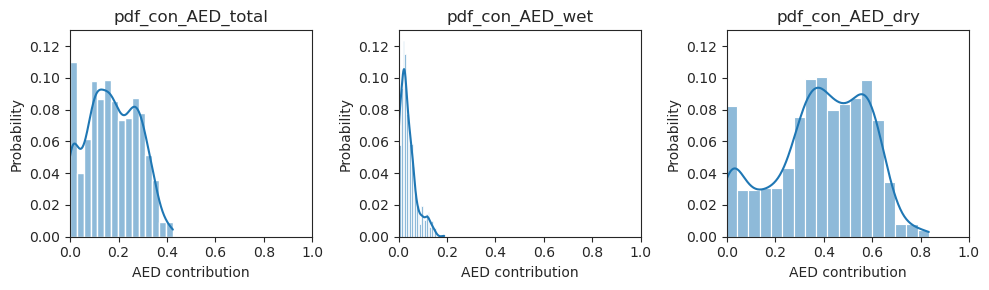

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

varia2 = [pdf_con_AED_total, pdf_con_AED_wet, pdf_con_AED_dry]
sns.set_style('white')

fig, ax = plt.subplots(1, 3, figsize=(10, 3), dpi=100)

for i in range(3):
    sns.histplot(varia2[i], kde=True, 
                 stat='probability', 
                 ax=ax[i],)
    ax[i].set_xlabel('AED contribution')  
    ax[i].set_xlim(0, 1)
    ax[i].set_ylim(0, 0.13)
    ax[i].set_ylabel('Probability')
    ax[i].xaxis.set_ticks_position('bottom')  
    ax[i].yaxis.set_ticks_position('left')  
    ax[i].tick_params(direction='out')  

ax[0].set_title('pdf_con_AED_total')
ax[1].set_title('pdf_con_AED_wet')
ax[2].set_title('pdf_con_AED_dry')

plt.tight_layout()
plt.show()
